In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Seuils de sécurité
seuil_air = 65
seuil_eau = 100
seuil_huile = 115

# Définition des dates de début et de fin pour l'analyse
#date_debut = '2022-08-22'
#date_fin = '2023-09-13'

date_debut = '2022-08-22'
date_fin = '2023-09-13'

heure_debut = 5
heure_fin = 24

# Chargement du fichier CSV
#file_path = 'Train181.csv'
#train_data = pd.read_csv(file_path, sep=';', low_memory=False)

file_paths = ['tbl_AR41 - 20 Trains - Group 5 - 2023-12-17.csv']

# Création d'une liste vide pour stocker les DataFrames
dataframes = []

# Boucle sur chaque fichier
for file_path in file_paths:
    # Lecture du fichier CSV et ajout au DataFrame
    df = pd.read_csv(file_path, sep=';', low_memory=False)
    dataframes.append(df)

# Concaténation de tous les DataFrames en un seul
train_data = pd.concat(dataframes, ignore_index=True)


distances_path = 'distancesjours.csv'
distances_data = pd.read_csv(distances_path, sep=';')

# Assurez-vous que les colonnes de température sont numériques
train_data['RS_E_InAirTemp_PC1'] = pd.to_numeric(train_data['RS_E_InAirTemp_PC1'], errors='coerce')
train_data['RS_E_WatTemp_PC1'] = pd.to_numeric(train_data['RS_E_WatTemp_PC1'], errors='coerce')
train_data['RS_T_OilTemp_PC1'] = pd.to_numeric(train_data['RS_T_OilTemp_PC1'], errors='coerce')
train_data['RS_E_OilPress_PC1'] = pd.to_numeric(train_data['RS_E_OilPress_PC1'], errors='coerce')
train_data['RS_E_RPM_PC1'] = pd.to_numeric(train_data['RS_E_RPM_PC1'], errors='coerce')

train_data['RS_E_InAirTemp_PC2'] = pd.to_numeric(train_data['RS_E_InAirTemp_PC2'], errors='coerce')
train_data['RS_E_WatTemp_PC2'] = pd.to_numeric(train_data['RS_E_WatTemp_PC2'], errors='coerce')
train_data['RS_T_OilTemp_PC2'] = pd.to_numeric(train_data['RS_T_OilTemp_PC2'], errors='coerce')
train_data['RS_E_OilPress_PC2'] = pd.to_numeric(train_data['RS_E_OilPress_PC2'], errors='coerce')
train_data['RS_E_RPM_PC2'] = pd.to_numeric(train_data['RS_E_RPM_PC2'], errors='coerce')

train_data['temperature'] = train_data['temperature'].str.replace(',', '.').astype(float)
train_data['Distance'] = train_data['Distance'].str.replace(',', '.').astype(float)
train_data['MovingSpeed'] = pd.to_numeric(train_data['MovingSpeed'], errors='coerce')
train_data['Slope'] = pd.to_numeric(train_data['Slope'], errors='coerce')
train_data['elevation'] = pd.to_numeric(train_data['elevation'], errors='coerce')
train_data['VerticalDisplacement'] = pd.to_numeric(train_data['VerticalDisplacement'], errors='coerce')
train_data['IsMoving'] = pd.to_numeric(train_data['IsMoving'], errors='coerce')
train_data['RS_E_RPM_Delta'] = pd.to_numeric(train_data['RS_E_RPM_Delta'], errors='coerce')

train_data['RS_E_InAirTemp_PC1'].fillna(train_data['RS_E_InAirTemp_PC1'].mode()[0], inplace=True)
train_data['RS_E_WatTemp_PC1'].fillna(train_data['RS_E_WatTemp_PC1'].mode()[0], inplace=True)
train_data['RS_T_OilTemp_PC1'].fillna(train_data['RS_T_OilTemp_PC1'].mode()[0], inplace=True)
train_data['RS_E_RPM_PC1'].fillna(train_data['RS_E_RPM_PC1'].mode()[0], inplace=True)

train_data['RS_E_InAirTemp_PC2'].fillna(train_data['RS_E_InAirTemp_PC2'].mode()[0], inplace=True)
train_data['RS_E_WatTemp_PC2'].fillna(train_data['RS_E_WatTemp_PC2'].mode()[0], inplace=True)
train_data['RS_T_OilTemp_PC2'].fillna(train_data['RS_T_OilTemp_PC2'].mode()[0], inplace=True)
train_data['RS_E_RPM_PC2'].fillna(train_data['RS_E_RPM_PC2'].mode()[0], inplace=True)

train_data['MovingSpeed'].fillna(train_data['MovingSpeed'].mode()[0], inplace=True)
train_data['Distance'].fillna(train_data['Distance'].mode()[0], inplace=True)
train_data['Slope'].fillna(train_data['Slope'].mode()[0], inplace=True)
train_data['elevation'].fillna(train_data['elevation'].mode()[0], inplace=True)
train_data['VerticalDisplacement'].fillna(train_data['VerticalDisplacement'].mode()[0], inplace=True)

# moteur en fonctionnement
train_data['UnMoteurEnMouvement'] = ((train_data['RS_E_RPM_PC1'] > 0) & (train_data['RS_E_RPM_PC2'] == 0) | 
                               (train_data['RS_E_RPM_PC1'] == 0) & (train_data['RS_E_RPM_PC2'] > 0)) & (train_data['IsMoving'] == 1)

# Convertir les horodatages
train_data['timestamps_UTC'] = pd.to_datetime(train_data['timestamps_UTC'])
train_data.sort_values(by='timestamps_UTC', inplace=True)

# Valeurs hors limites
train_data['Air_Hors_Limite_1'] = train_data['RS_E_InAirTemp_PC1'] > seuil_air
train_data['Eau_Hors_Limite_1'] = train_data['RS_E_WatTemp_PC1'] > seuil_eau
train_data['Huile_Hors_Limite_1'] = train_data['RS_T_OilTemp_PC1'] > seuil_huile
train_data['Press_Hors_Limite_1'] = (train_data['RS_E_OilPress_PC1'] / 10) > 55
train_data['Air_Hors_Limite_2'] = train_data['RS_E_InAirTemp_PC2'] > seuil_air
train_data['Eau_Hors_Limite_2'] = train_data['RS_E_WatTemp_PC2'] > seuil_eau
train_data['Huile_Hors_Limite_2'] = train_data['RS_T_OilTemp_PC2'] > seuil_huile
train_data['Press_Hors_Limite_2'] = (train_data['RS_E_OilPress_PC2'] / 10) > 55

train_data['RS_E_InAirTemp_PC1'] = train_data['RS_E_InAirTemp_PC1'].clip(upper=150)
train_data['Air_Hors_Limite_1'] = train_data['Air_Hors_Limite_1'].clip(upper=150)
train_data['RS_E_InAirTemp_PC2'] = train_data['RS_E_InAirTemp_PC2'].clip(upper=150)
train_data['Air_Hors_Limite_2'] = train_data['Air_Hors_Limite_2'].clip(upper=150)
train_data['RS_E_WatTemp_PC1'] = train_data['RS_E_WatTemp_PC1'].clip(upper=150)
train_data['RS_T_OilTemp_PC1'] = train_data['RS_T_OilTemp_PC1'].clip(upper=150)

# Trains en panne
train_data['EnPanne'] = train_data['timestamps_UTC'].diff().dt.days > 4 # 1 jour


# Convertir la colonne 'date' dans distances_data en datetime pour la fusion
distances_data['date'] = pd.to_datetime(distances_data['date'])

# Fusionner les données de distance avec les données du train sur 'vehicle_id' et 'date'
#train_data['timestamps_UTC'] = pd.to_datetime(train_data['timestamps_UTC']).dt.date
#train_data = train_data.merge(distances_data, how='left', left_on=['vehicle_id', 'timestamps_UTC'], right_on=['vehicle_id', 'date'])

# Populer la nouvelle variable 'Immobile' avec True si 'total_distance' < 500 mètres, sinon False
#train_data['Immobile'] = train_data['total_distance'] < 500

# Créer une colonne temporaire pour la date dans train_data
train_data['temp_date'] = pd.to_datetime(train_data['timestamps_UTC']).dt.date
distances_data['date'] = pd.to_datetime(distances_data['date']).dt.date

# Fusionner train_data avec distances_data
train_data = pd.merge(train_data, distances_data, how='left', left_on=['vehicle_id', 'temp_date'], right_on=['vehicle_id', 'date'])

# Supprimer la colonne temporaire
train_data.drop('temp_date', axis=1, inplace=True)

# Remplacer les valeurs NaN dans 'total_distance' par 0
train_data['total_distance'] = train_data['total_distance'].fillna(0)
train_data['total_distance'] = train_data['total_distance'].str.replace(',', '.').astype(float)

# Calculer le champ 'Immobile'
train_data['Immobile'] = train_data['total_distance'] < 1000




# Filtrage des données pour les dates spécifiées
mask = (train_data['timestamps_UTC'] >= date_debut) & (train_data['timestamps_UTC'] <= date_fin) & (train_data['timestamps_UTC'].dt.hour >= heure_debut) & (train_data['timestamps_UTC'].dt.hour < heure_fin)
data_periode = train_data.loc[mask]



C:\Users\avanwelsenaere\AppData\Local\Temp\ipykernel_2708\1263303356.py:111: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  distances_data['date'] = pd.to_datetime(distances_data['date'])


C:\Users\avanwelsenaere\AppData\Local\Temp\ipykernel_2708\3503633850.py:25: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


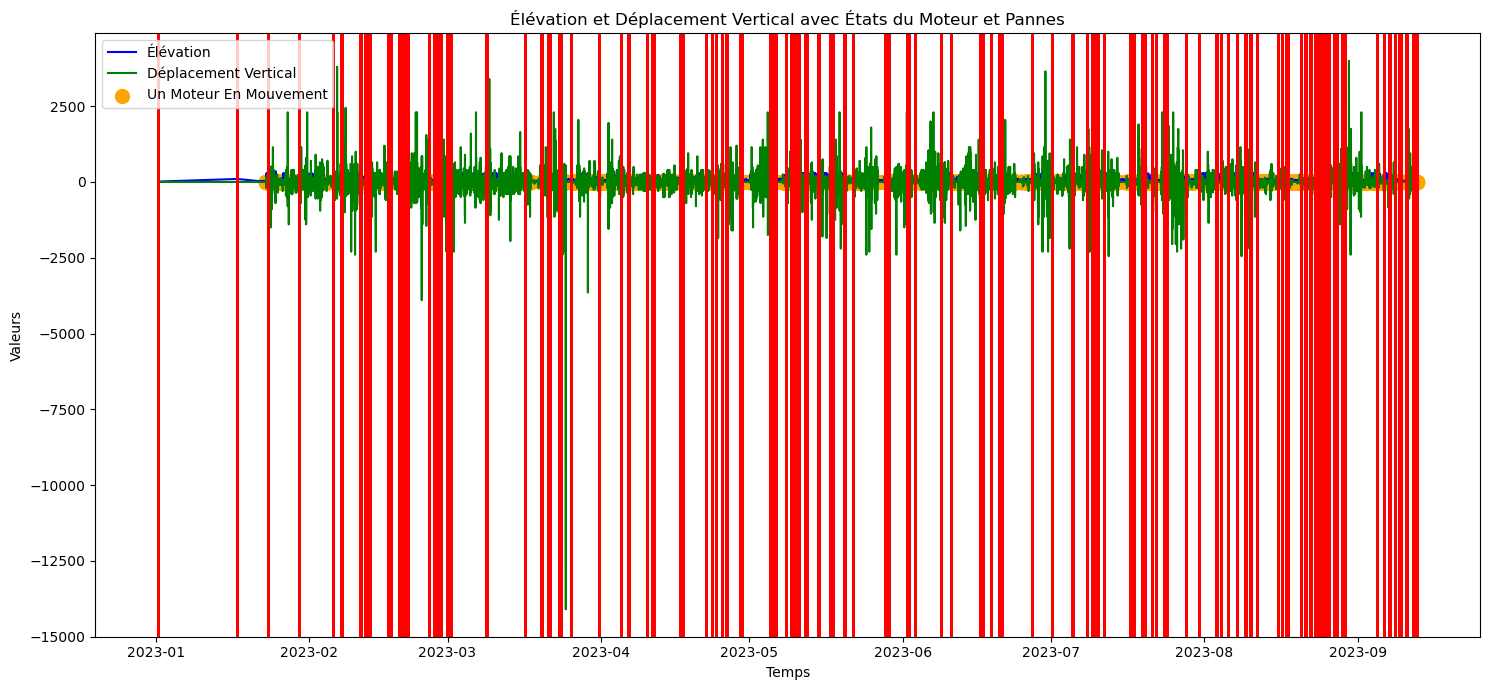

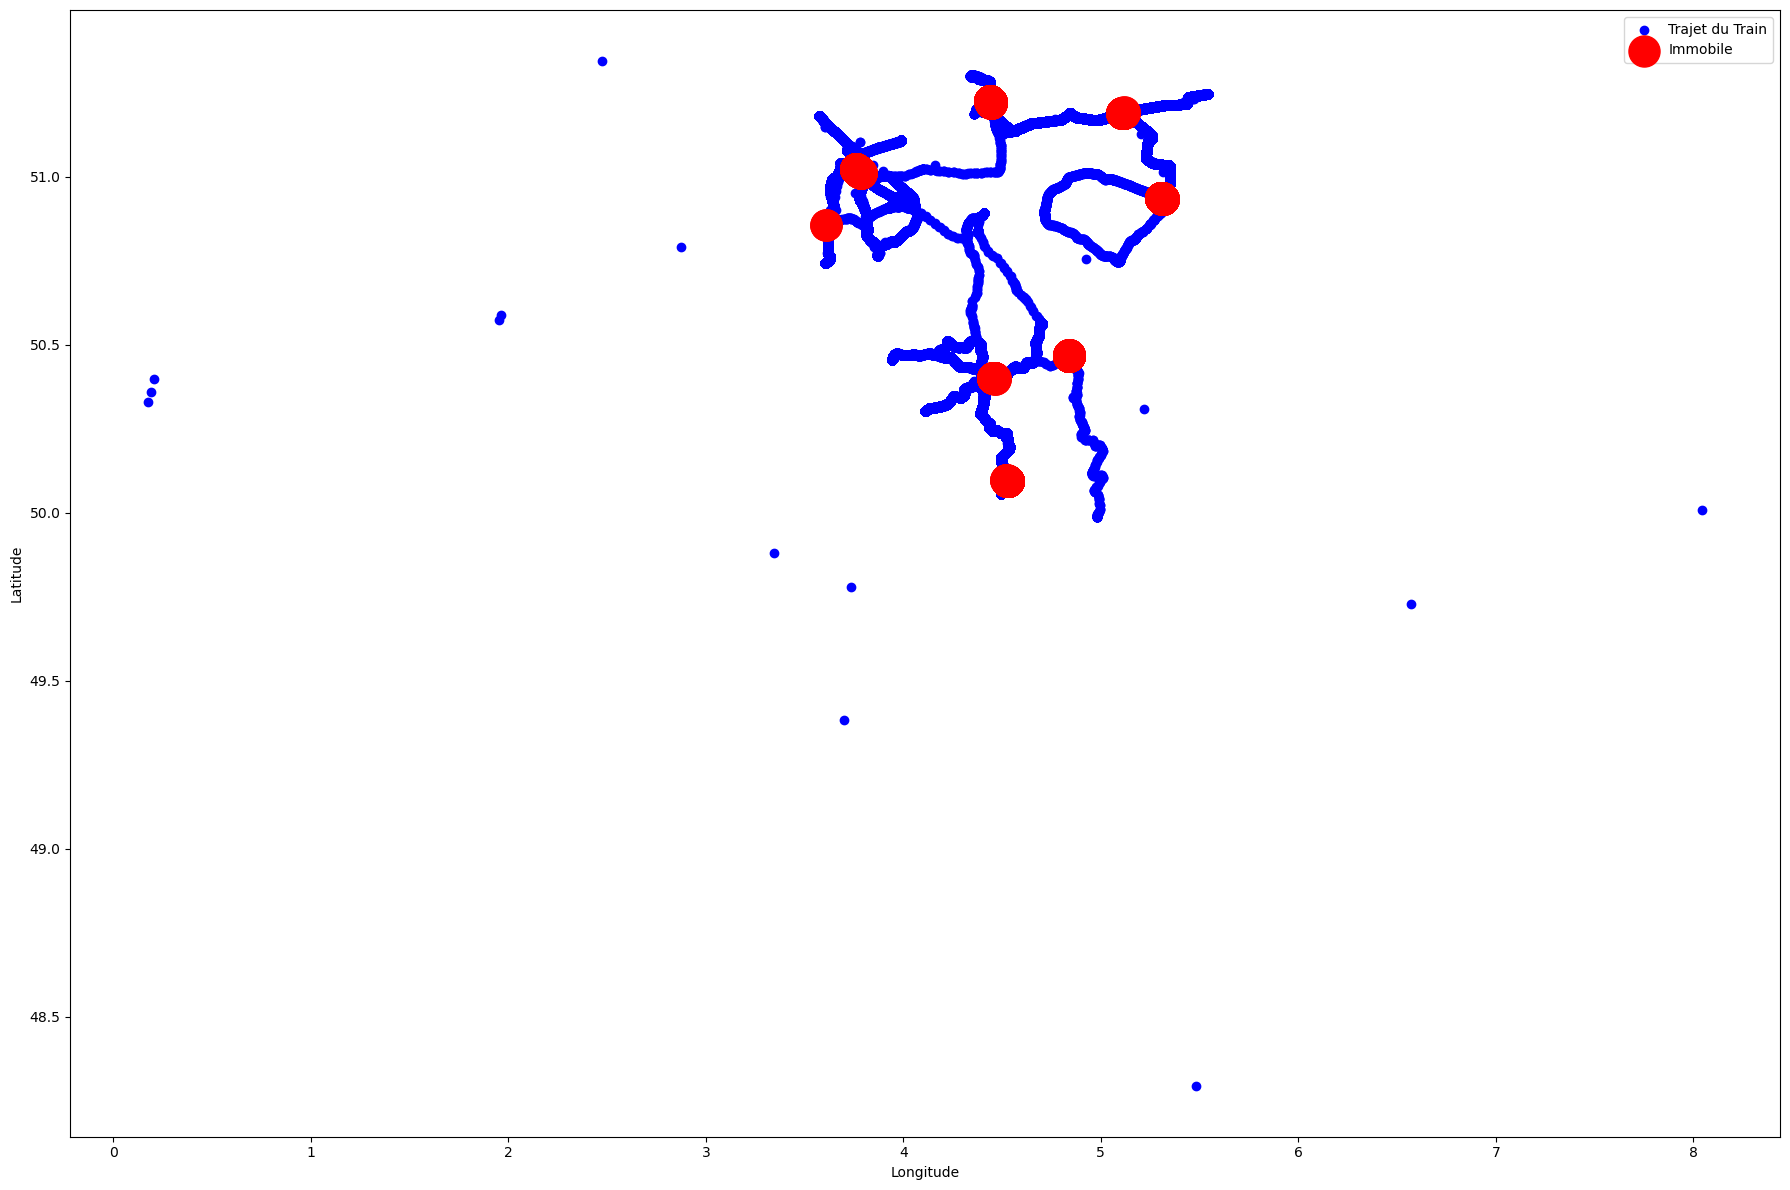

In [2]:
#CARTE #1
#========


# élévation et déplacement vertical
plt.figure(figsize=(15, 7))
plt.plot(data_periode['timestamps_UTC'], data_periode['elevation'], label='Élévation', color='blue')
plt.plot(data_periode['timestamps_UTC'], data_periode['VerticalDisplacement'] * 50, label='Déplacement Vertical', color='green')

# Marquer les moments où un seul moteur fonctionne
plt.scatter(data_periode['timestamps_UTC'][data_periode['UnMoteurEnMouvement'] == 1], 
            np.zeros(sum(data_periode['UnMoteurEnMouvement'] == 1)), 
            label='Un Moteur En Mouvement', 
            color='orange', 
            s=100)  # Taille des points

for i in data_periode[data_periode['Immobile']].index:
    plt.axvline(x=data_periode['timestamps_UTC'][i], color='red', linestyle='-', lw=2)

# Configuration des légendes et titres
plt.xlabel('Temps')
plt.ylabel('Valeurs')
plt.title('Élévation et Déplacement Vertical avec États du Moteur et Pannes')
plt.legend()
plt.tight_layout()
plt.show()



#CARTE #2
#========


# Créer un deuxième graphique pour le trajet du train
fig, ax2 = plt.subplots(figsize=(18, 12))

# Tracer le trajet du train suivant les coordonnées GPS
ax2.scatter(data_periode['lon'], data_periode['lat'], label='Trajet du Train', color='blue', linewidth=1)

# Ajouter les points rouges aux coordonnées où le train est en panne ou avec un seul moteur
#ax2.scatter(data_periode[data_periode['UnMoteurEnMouvement'] | data_periode['UnMoteurEnMouvement']]['lon'],
#            data_periode[data_periode['UnMoteurEnMouvement'] | data_periode['UnMoteurEnMouvement']]['lat'],
#            color='orange', label='Anomalies',  s=150)

# Ajouter les points rouges aux coordonnées où le train est en panne ou avec un seul moteur
ax2.scatter(data_periode[data_periode['Immobile']]['lon'],
            data_periode[data_periode['Immobile']]['lat'],
            color='red', label='Immobile', s=500)

# Mettre en forme le graphique du trajet
ax2.set_xlabel('Longitude')
ax2.set_ylabel('Latitude')
plt.legend()
plt.tight_layout()

# Afficher le graphique du trajet
plt.show()








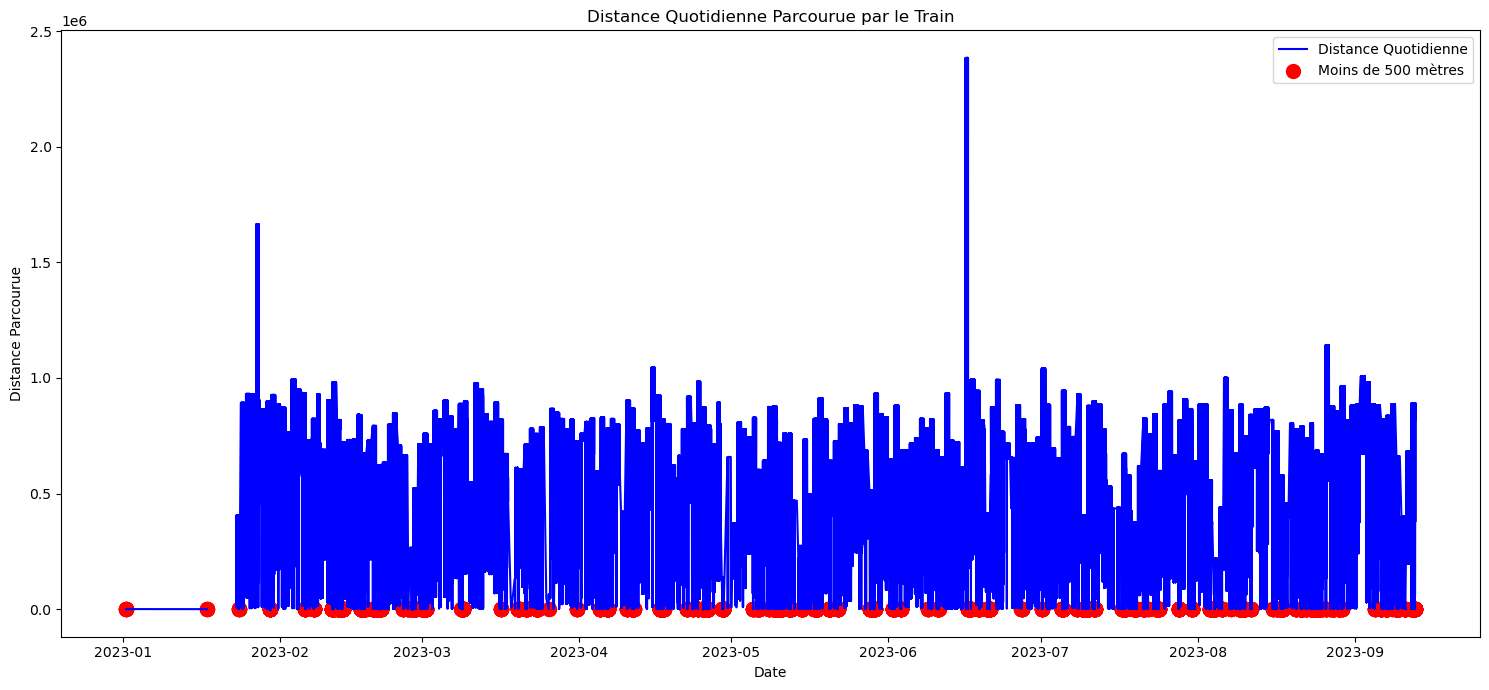

In [3]:
# Création du graphique
plt.figure(figsize=(15, 7))

# Tracer la distance quotidienne
plt.plot(data_periode['timestamps_UTC'], data_periode['total_distance'], label='Distance Quotidienne', color='blue')

# Marquer les jours avec moins de 500 mètres parcourus
jours_moins_500 = data_periode[data_periode['Immobile'] == True]
plt.scatter(jours_moins_500['timestamps_UTC'], jours_moins_500['total_distance'], color='red', label='Moins de 500 mètres', s=100)

# Configuration des légendes et titres
plt.xlabel('Date')
plt.ylabel('Distance Parcourue')
plt.title('Distance Quotidienne Parcourue par le Train')
plt.legend()
plt.tight_layout()

# Afficher le graphique
plt.show()














C:\Users\avanwelsenaere\AppData\Local\Temp\ipykernel_2708\3090007882.py:20: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


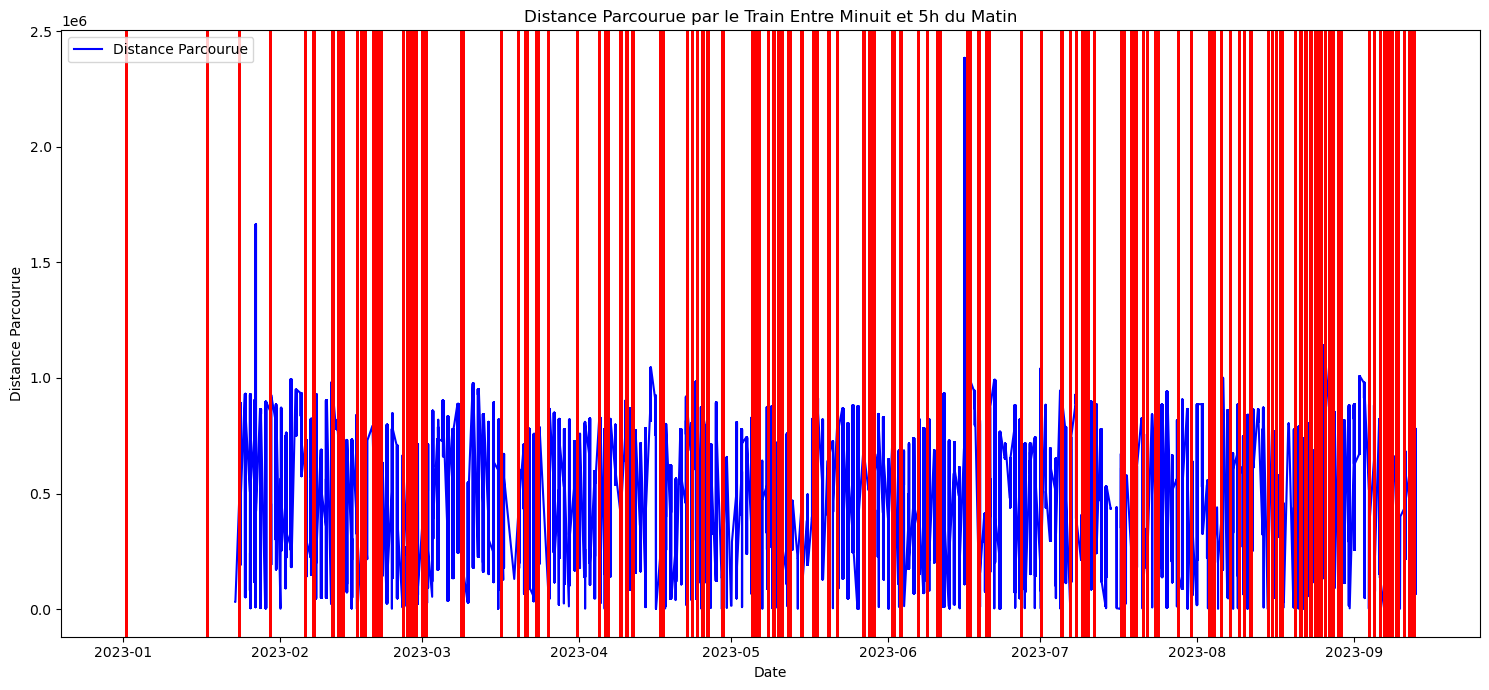

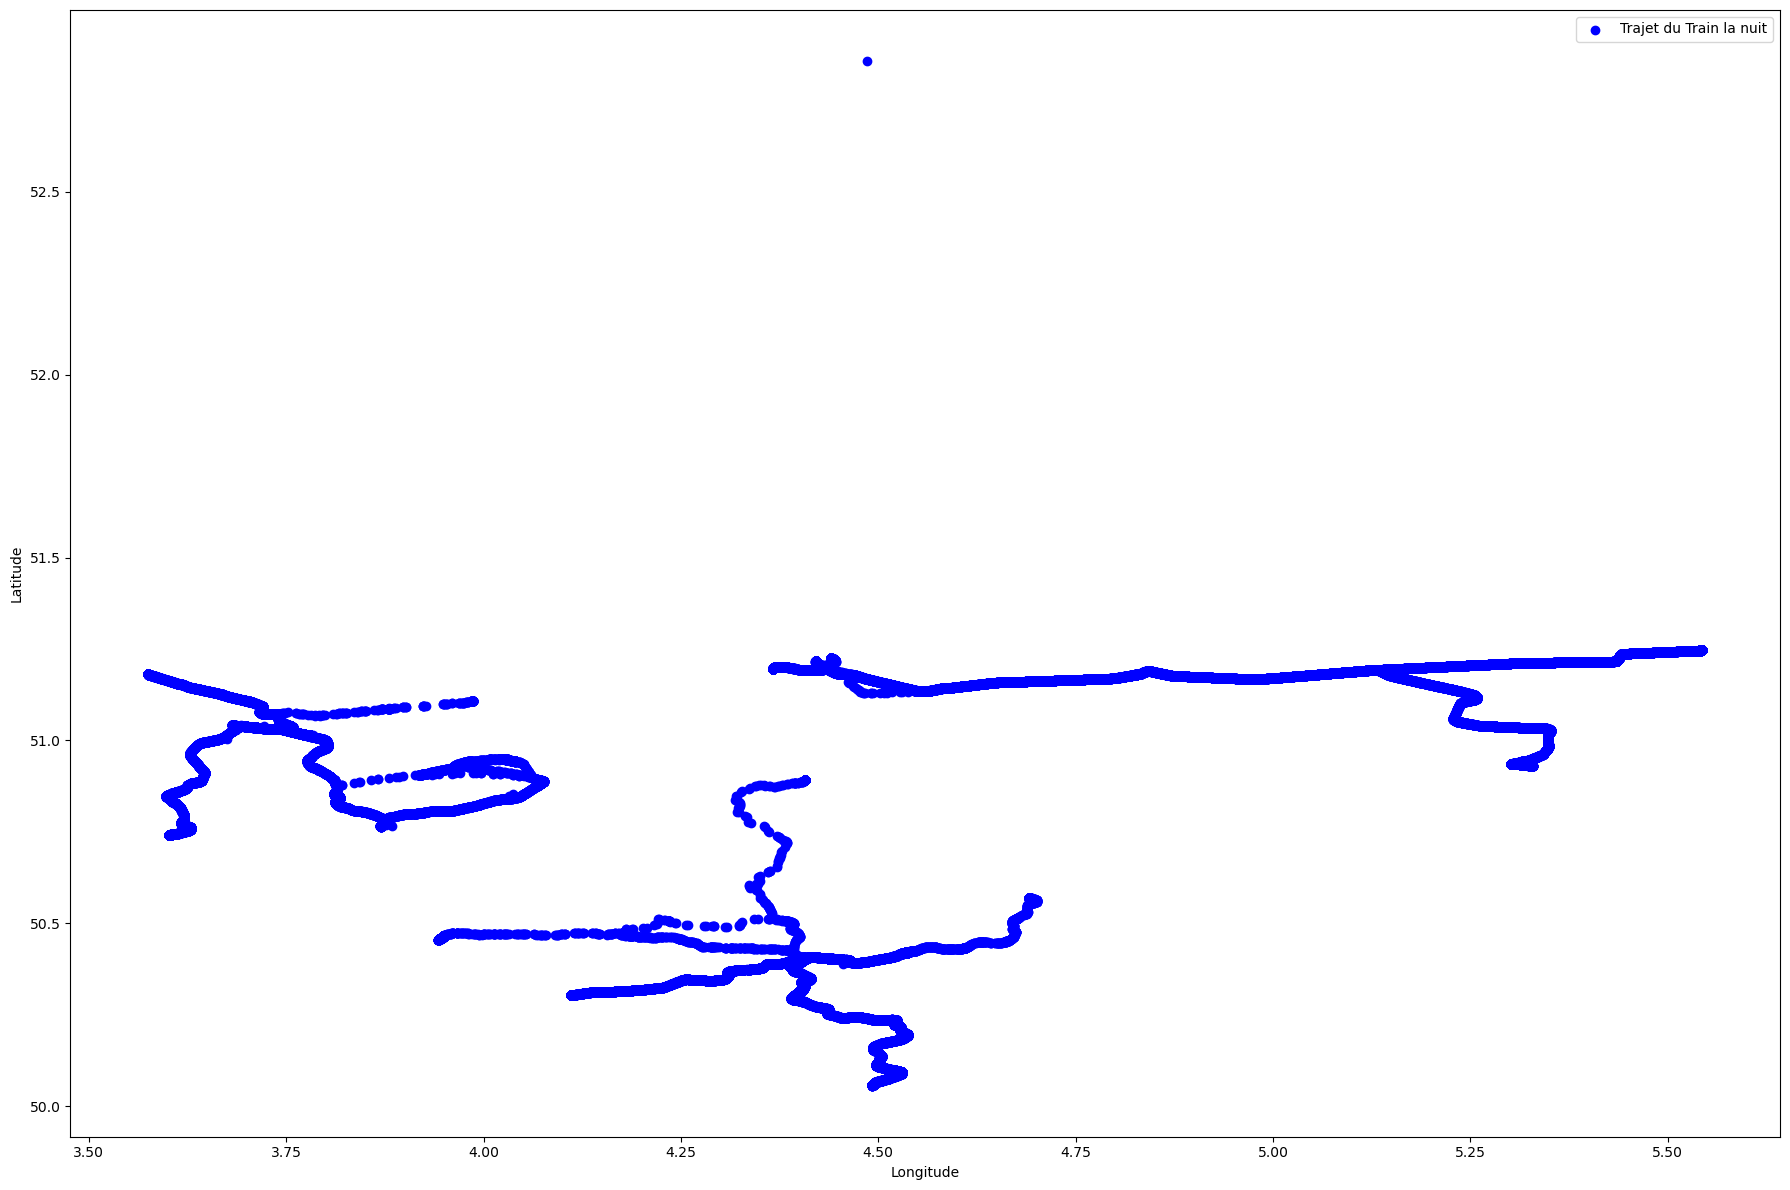

In [4]:
#CARTE #1
#========

# Filtrer les données pour les heures entre minuit et 5h du matin
data_nuit = train_data[(train_data['timestamps_UTC'].dt.hour >= 0) & (train_data['timestamps_UTC'].dt.hour < 5)]

# Création du graphique
plt.figure(figsize=(15, 7))
plt.plot(data_nuit['timestamps_UTC'], data_nuit['total_distance'], label='Distance Parcourue', color='blue')

# Marquer les jours avec moins de 500 mètres parcourus
for i in train_data[train_data['Immobile']].index:
    plt.axvline(x=train_data['timestamps_UTC'][i], color='red', linestyle='-', lw=2)

# Configuration des légendes et titres
plt.xlabel('Date')
plt.ylabel('Distance Parcourue')
plt.title('Distance Parcourue par le Train Entre Minuit et 5h du Matin')
plt.legend()
plt.tight_layout()
plt.show()





#CARTE #2
#========


# Créer un deuxième graphique pour le trajet du train
fig, ax2 = plt.subplots(figsize=(18, 12))

# Tracer le trajet du train suivant les coordonnées GPS
ax2.scatter(data_nuit['lon'], data_nuit['lat'], label='Trajet du Train la nuit', color='blue', linewidth=1)

# Mettre en forme le graphique du trajet
ax2.set_xlabel('Longitude')
ax2.set_ylabel('Latitude')
plt.legend()
plt.tight_layout()

# Afficher le graphique du trajet
plt.show()


<Figure size 1500x700 with 0 Axes>

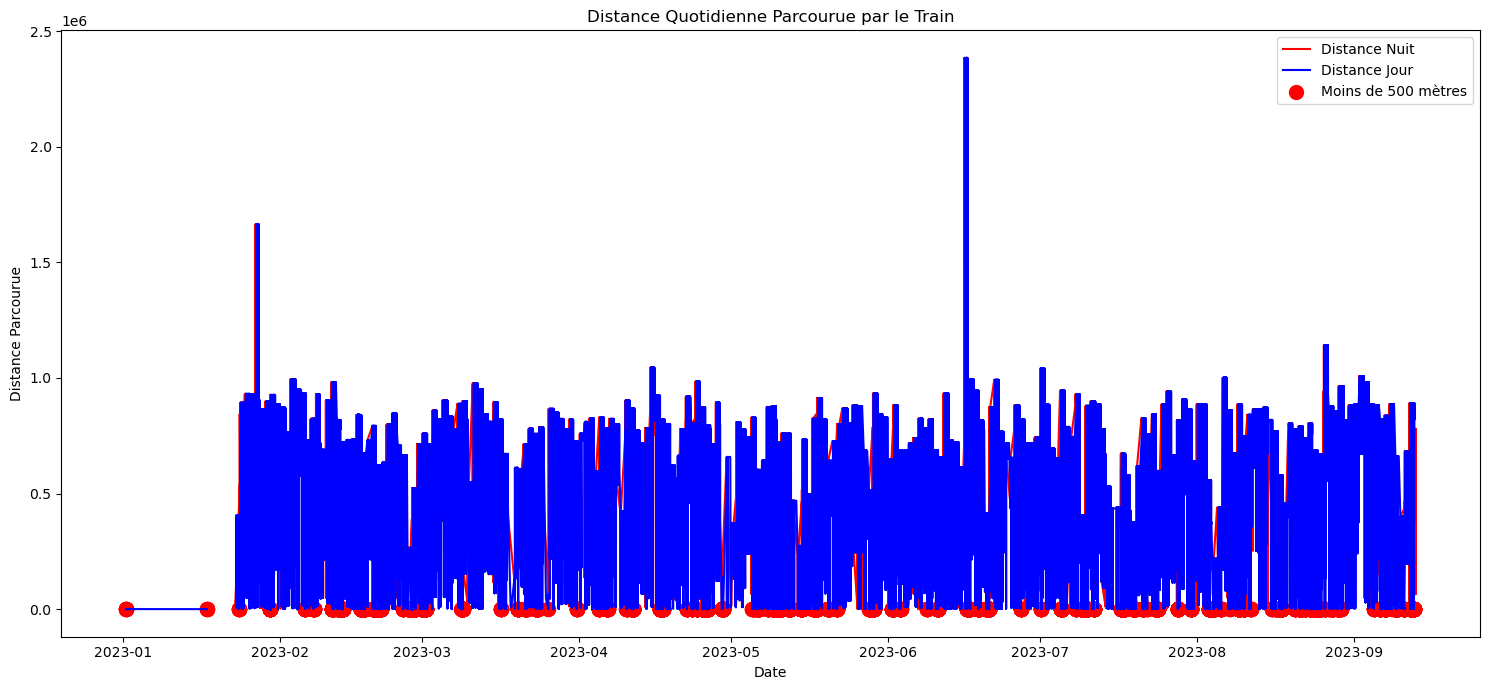

In [5]:
#CARTE #1
#========

# Création du graphique
plt.figure(figsize=(15, 7))

# Filtrer les données pour les heures entre minuit et 5h du matin
data_nuit = train_data[(train_data['timestamps_UTC'].dt.hour >= 0) & (train_data['timestamps_UTC'].dt.hour < 5)]

# Création du graphique
plt.figure(figsize=(15, 7))

plt.plot(data_nuit['timestamps_UTC'], data_nuit['total_distance'], label='Distance Nuit', color='red')
plt.plot(data_periode['timestamps_UTC'], data_periode['total_distance'], label='Distance Jour', color='blue')

# Marquer les jours avec moins de 500 mètres parcourus
jours_moins_500 = data_periode[data_periode['Immobile'] == True]
plt.scatter(jours_moins_500['timestamps_UTC'], jours_moins_500['total_distance'], color='red', label='Moins de 500 mètres', s=100)

# Configuration des légendes et titres
plt.xlabel('Date')
plt.ylabel('Distance Parcourue')
plt.title('Distance Quotidienne Parcourue par le Train')
plt.legend()
plt.tight_layout()

# Afficher le graphique
plt.show()





# Marquer les jours avec moins de 500 mètres parcourus
#for i in train_data[train_data['Immobile']].index:
#    plt.axvline(x=train_data['timestamps_UTC'][i], color='red', linestyle='-', lw=2)



TypeError: float() argument must be a string or a real number, not 'datetime.date'

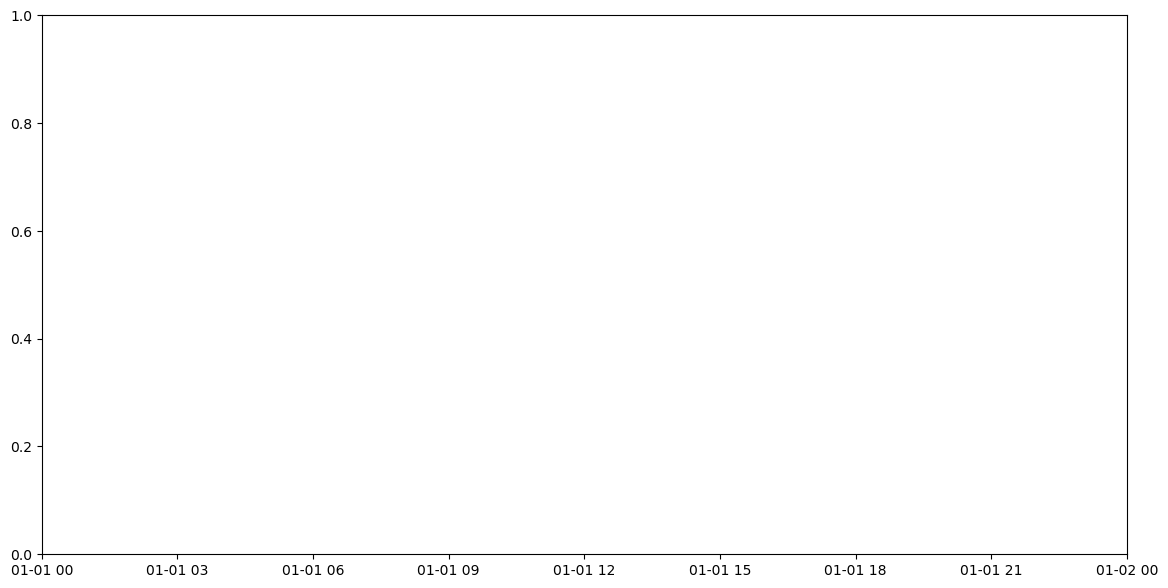

In [6]:
# Calcul de la somme des distances sur une fenêtre glissante de 3 jours pour chaque train
train_data['rolling_distance'] = train_data.groupby('vehicle_id')['total_distance'].rolling(window=3, min_periods=1).sum().reset_index(level=0, drop=True)

# Définir un seuil pour lequel on considère que le train est en panne
threshold_distance = 1000  # en mètres

# Identifier les jours où le train fait moins de 1000 mètres en 3 jours
train_data['low_activity'] = train_data['rolling_distance'] < threshold_distance

# Filtrer les données pour une période donnée, si nécessaire
#start_date = 'YYYY-MM-DD'
#end_date = 'YYYY-MM-DD'
#train_data = train_data[(train_data['date'] >= start_date) & (train_data['date'] <= end_date)]

# Tracer le graphique avec les jours à faible activité marqués en rouge
plt.figure(figsize=(14, 7))
for vehicle_id, group_data in train_data.groupby('vehicle_id'):
    # Tracer la ligne de l'élévation ou du déplacement vertical
    plt.plot(group_data['date'], group_data['elevation'], label=f'Élévation {vehicle_id}')
    
    # Marquer les jours à faible activité en rouge
    low_activity_days = group_data[group_data['low_activity']]['date']
    plt.scatter(low_activity_days, group_data[group_data['low_activity']]['elevation'], color='red', label=f'Faible activité {vehicle_id}', zorder=5)

# Formater le graphique
plt.xlabel('Date')
plt.ylabel('Élévation')
plt.title('Activité du train sur la période')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# TENDANCES TEMPORELLES
variable = 'temperature'

# Tracer la tendance temporelle de la variable sélectionnée
plt.figure(figsize=(12, 6))
plt.plot(train_data['timestamps_UTC'], train_data[variable])
plt.title(f'Tendance temporelle de {variable}')
plt.xlabel('Temps')
plt.ylabel(variable)
plt.show()

# Analyse de la saisonnalité => moyenne quotidienne)
train_data['day'] = train_data['timestamps_UTC'].dt.date
daily_avg = train_data.groupby('day')[variable].mean()

plt.figure(figsize=(12, 6))
plt.plot(daily_avg)
plt.title(f'Moyenne quotidienne de {variable}')
plt.xlabel('Jour')
plt.ylabel(f'Moyenne quotidienne de {variable}')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
train_data['RS_E_WatTemp_PC1'].plot(kind='hist', bins=50, title='Distribution de RS_E_WatTemp_PC1')
plt.xlabel('RS_E_WatTemp_PC1')
plt.show()

plt.figure(figsize=(10, 6))
train_data['RS_E_RPM_PC1'].plot(kind='hist', bins=50, title='Distribution de RS_E_RPM_PC1')
plt.xlabel('RS_E_RPM_PC1')
plt.show()

plt.figure(figsize=(10, 6))
train_data['RS_E_RPM_Delta'].plot(kind='hist', bins=50, title='Distribution de RS_E_RPM_Delta')
plt.xlabel('RS_E_RPM_Delta')
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(train_data['timestamps_UTC'], train_data['RS_E_InAirTemp_PC1'], label='Température de l\'Air PC1')
plt.xlabel('Temps')
plt.ylabel('Température')
plt.title('Tendance de la Température de l\'Air pour PC1')
plt.legend()
plt.show()

In [ ]:
# AFFICHAGE EN GRAPHE DES PANNES VERSUS 1 SEUL MOTEUR EN MOUVEMENT

plt.figure(figsize=(15, 8))

plt.scatter(train_data['timestamps_UTC'][train_data['UnMoteurEnMouvement']], train_data['EnPanne'][train_data['UnMoteurEnMouvement']], 
            color='orange', label='Un Moteur En Mouvement')

for i in train_data[train_data['EnPanne']].index:
    plt.axvline(x=train_data['timestamps_UTC'][i], color='red', linestyle='--', lw=0.5)

plt.xlabel('Temps')
plt.ylabel('RPM 1')
plt.title('RPM 1 avec Indicateurs de Moteur et de Panne')
plt.legend()
plt.show()




In [ ]:
# Visualisation
plt.figure(figsize=(15, 8))

plt.scatter(train_data['timestamps_UTC'][train_data['Air_Hors_Limite_1']], train_data['RS_E_InAirTemp_PC1'][train_data['Air_Hors_Limite_1']], color='red', label='Air Hors Limite 1')
plt.scatter(train_data['timestamps_UTC'][train_data['Eau_Hors_Limite_1']], train_data['RS_E_WatTemp_PC1'][train_data['Eau_Hors_Limite_1']], color='blue', label='Eau Hors Limite 1')
plt.scatter(train_data['timestamps_UTC'][train_data['Huile_Hors_Limite_1']], train_data['RS_T_OilTemp_PC1'][train_data['Huile_Hors_Limite_1']], color='green', label='Huile Hors Limite 1')
plt.scatter(train_data['timestamps_UTC'][train_data['Press_Hors_Limite_1']], train_data['RS_E_OilPress_PC1'][train_data['Press_Hors_Limite_1']], color='black', label='Pression Hors Limite 1')
plt.scatter(train_data['timestamps_UTC'][train_data['Press_Hors_Limite_2']], train_data['RS_E_OilPress_PC2'][train_data['Press_Hors_Limite_2']], color='black', label='Pression Hors Limite 1')
plt.scatter(train_data['timestamps_UTC'][train_data['Air_Hors_Limite_2']], train_data['RS_E_InAirTemp_PC2'][train_data['Air_Hors_Limite_2']], color='red', label='Air Hors Limite 2')
plt.scatter(train_data['timestamps_UTC'][train_data['Eau_Hors_Limite_2']], train_data['RS_E_WatTemp_PC2'][train_data['Eau_Hors_Limite_2']], color='blue', label='Eau Hors Limite 2')
plt.scatter(train_data['timestamps_UTC'][train_data['Huile_Hors_Limite_2']], train_data['RS_T_OilTemp_PC2'][train_data['Huile_Hors_Limite_2']], color='green', label='Huile Hors Limite 2')

# Marquer les moments où un seul moteur fonctionne
plt.scatter(train_data['timestamps_UTC'][train_data['UnMoteurEnMouvement']], train_data['EnPanne'][train_data['UnMoteurEnMouvement']], 
            color='orange', label='Un Moteur En Mouvement')

# Indiquer les périodes de panne
for i in train_data[train_data['EnPanne']].index:
    plt.axvline(x=train_data['timestamps_UTC'][i], color='red', linestyle='--', lw=1, label='Train En Panne')

plt.xlabel('Temps')
plt.ylabel('Température')
plt.title('Températures avec Valeurs Hors Limites')
plt.legend()
plt.show()


In [ ]:
from sklearn.ensemble import IsolationForest

# Sélection des caractéristiques
features = train_data[['RS_E_InAirTemp_PC1', 'RS_E_WatTemp_PC1', 'RS_T_OilTemp_PC1']] # Ajoutez d'autres caractéristiques pertinentes

# Création du modèle
iso_forest = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
iso_forest.fit(features)

# Prédiction des anomalies
anomalies = iso_forest.predict(features)
train_data['Anomalie'] = anomalies

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Sélection des caractéristiques (features) et de la cible (target)
features = train_data[['RS_E_InAirTemp_PC1', 'RS_E_WatTemp_PC1', 'RS_E_OilPress_PC1', 'RS_T_OilTemp_PC1','RS_E_InAirTemp_PC2', 'RS_E_WatTemp_PC2', 'RS_E_OilPress_PC2', 'RS_T_OilTemp_PC2']]  # Ajoutez ou remplacez par les colonnes pertinentes
target = train_data['EnPanne']

# Suppression des lignes avec des valeurs manquantes dans les features ou la target
data_clean = train_data.dropna(subset=features.columns.tolist() + ['EnPanne'])

# Division des données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(data_clean[features.columns], data_clean['EnPanne'], test_size=0.2, random_state=42)

# Création et entraînement du modèle
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Évaluation du modèle
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))


In [ ]:
# Filtrage des périodes où le train est à l'arrêt pendant plusieurs jours
train_data['time_diff'] = train_data['timestamps_UTC'].diff().dt.total_seconds().div(3600) # Différence en heures
long_stops = train_data[(train_data['time_diff'] > 24) & (train_data['IsMoving'] == 0)]

# Filtrage des moments où un moteur est à 0 RPM tandis que l'autre fonctionne et que le train est en mouvement
one_engine_off = train_data[(train_data['IsMoving'] == 1) & ((train_data['RS_E_RPM_PC1'] == 0) | (train_data['RS_E_RPM_PC2'] == 0)) & (train_data['RS_E_RPM_PC1'] != train_data['RS_E_RPM_PC2'])]

# Affichage des premières lignes des données filtrées
filtered_summary = {
    "Long Stops": long_stops.head(),
    "One Engine Off While Moving": one_engine_off.head()
}

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Sélection des caractéristiques pour le clustering
features = train_data[['RS_E_WatTemp_PC1', 'RS_T_OilTemp_PC1', 'RS_E_RPM_PC1']]

# Normalisation des caractéristiques
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Application du K-Means
kmeans = KMeans(n_clusters=4, random_state=42)  # Vous pouvez expérimenter avec le nombre de clusters
clusters = kmeans.fit_predict(features_scaled)

# Ajouter les clusters au DataFrame
train_data['Cluster'] = clusters

# Visualisation des clusters
plt.scatter(train_data['RS_E_WatTemp_PC1'], train_data['RS_E_RPM_PC1'], c=train_data['Cluster'])
plt.xlabel('Température de l\'eau PC1')
plt.ylabel('RPM PC1')
plt.title('Clustering des Données')
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# Sélection des caractéristiques pour le clustering
features = train_data[['RS_E_InAirTemp_PC1', 'RS_E_WatTemp_PC1', 'RS_E_RPM_PC1', 'RS_T_OilTemp_PC1']]

# Normalisation des caractéristiques
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Application du K-Means
kmeans = KMeans(n_clusters=2, random_state=42)  # Vous pouvez expérimenter avec le nombre de clusters
clusters = kmeans.fit_predict(features_scaled)

# Ajouter les clusters au DataFrame pour une analyse ultérieure
train_data['Cluster'] = clusters

# Trouver les observations où un seul moteur fonctionne et le train est en panne
train_data['UnMoteurEnMouvement'] = ((train_data['RS_E_RPM_PC1'] > 0) & (train_data['RS_E_RPM_PC2'] == 0)) | ((train_data['RS_E_RPM_PC1'] == 0) & (train_data['RS_E_RPM_PC2'] > 0))
train_data['EnPanne'] = train_data['EnPanne'].astype(bool)

# Filtrer les observations du cluster minoritaire
cluster_minoritaire = train_data[train_data['Cluster'] == 1]

# Visualisation des clusters
plt.figure(figsize=(12, 6))
plt.scatter(train_data['RS_E_InAirTemp_PC1'], train_data['RS_E_RPM_PC1'], c=train_data['Cluster'], cmap='viridis', alpha=0.5)
plt.title('Clusters de Température et RPM')
plt.xlabel('Température de l\'Air PC1')
plt.ylabel('RPM PC1')
plt.colorbar(label='Cluster')
plt.show()

# Visualisation des observations où un seul moteur fonctionne
plt.figure(figsize=(12, 6))
plt.scatter(cluster_minoritaire['RS_E_InAirTemp_PC1'], cluster_minoritaire['RS_E_RPM_PC1'], 
            c=cluster_minoritaire['UnMoteurEnMouvement'], cmap='coolwarm', alpha=0.5)
plt.title('Un Moteur En Mouvement dans le Cluster Minoritaire')
plt.xlabel('Température de l\'Air PC1')
plt.ylabel('RPM PC1')
plt.colorbar(label='Un Moteur En Mouvement')
plt.show()

# Visualisation des observations où le train est en panne
plt.figure(figsize=(12, 6))
plt.scatter(cluster_minoritaire['RS_E_InAirTemp_PC1'], cluster_minoritaire['RS_E_RPM_PC1'], 
            c=cluster_minoritaire['EnPanne'], cmap='coolwarm', alpha=0.5)
plt.title('Train En Panne dans le Cluster Minoritaire')
plt.xlabel('Température de l\'Air PC1')
plt.ylabel('RPM PC1')
plt.colorbar(label='Train En Panne')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler



# Sélection des caractéristiques pour le clustering
features = train_data[['MovingSpeed', 'Slope', 'elevation', 'VerticalDisplacement', 'RS_E_RPM_PC1']]

# Normalisation des caractéristiques
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Application du K-Means
kmeans = KMeans(n_clusters=3, random_state=42)  # Vous pouvez expérimenter avec le nombre de clusters
clusters = kmeans.fit_predict(features_scaled)

# Ajouter les clusters au DataFrame pour une analyse ultérieure
train_data['Cluster'] = clusters

# Filtrer les observations du cluster minoritaire
cluster_minoritaire = train_data[train_data['Cluster'] == 1]

# Analyse contextuelle des observations du cluster minoritaire
# Par exemple, vous pouvez regarder l'heure de la journée ou les conditions météorologiques si ces données sont disponibles
# Pour cet exemple, nous allons simplement créer des graphiques pour visualiser les données

# Visualisation des clusters
plt.figure(figsize=(12, 6))
plt.scatter(train_data['RS_E_InAirTemp_PC1'], train_data['RS_E_RPM_PC1'], c=train_data['Cluster'], cmap='viridis', alpha=0.5)
plt.title('Clusters de Vitesse et RPM')
plt.xlabel('Vitesse')
plt.ylabel('RPM PC1')
plt.colorbar(label='Cluster')
plt.show()

# Visualisation des observations où un seul moteur fonctionne
plt.figure(figsize=(12, 6))
plt.scatter(cluster_minoritaire['RS_E_InAirTemp_PC1'], cluster_minoritaire['RS_E_RPM_PC1'], 
            c=cluster_minoritaire['UnMoteurEnMouvement'], cmap='coolwarm', alpha=0.5)
plt.title('Un Moteur En Mouvement dans le Cluster Minoritaire')
plt.xlabel('Température de l\'Air PC1')
plt.ylabel('RPM PC1')
plt.colorbar(label='Un Moteur En Mouvement')
plt.show()

# Visualisation des observations où le train est en panne
plt.figure(figsize=(12, 6))
plt.scatter(cluster_minoritaire['RS_E_InAirTemp_PC1'], cluster_minoritaire['RS_E_RPM_PC1'], 
            c=cluster_minoritaire['EnPanne'], cmap='coolwarm', alpha=0.5)
plt.title('Train En Panne dans le Cluster Minoritaire')
plt.xlabel('Température de l\'Air PC1')
plt.ylabel('RPM PC1')
plt.colorbar(label='Train En Panne')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Conversion des timestamps en moment de la journée
train_data['Moment_Journee'] = pd.to_datetime(train_data['timestamps_UTC']).dt.hour

# Catégorisation des moments de la journée
bins = [0, 6, 12, 18, 24]
labels = ['Nuit', 'Matin', 'Apres-midi', 'Soir']
train_data['Moment_Journee_Cat'] = pd.cut(train_data['Moment_Journee'], bins=bins, labels=labels, right=False)

# Calcul de la corrélation
correlation_matrix = train_data[['RS_E_InAirTemp_PC1', 'RS_E_RPM_PC1', 'temperature', 'elevation', 'VerticalDisplacement']].corr()

# Visualisation de la matrice de corrélation
sns.heatmap(correlation_matrix, annot=True)
plt.show()

# Pour la corrélation avec les catégories de moment de la journée, vous pouvez utiliser des tests statistiques comme le chi-squared test pour les variables catégorielles.
